In [1]:
import pandas as pd

df = pd.read_csv("music.csv")

In [2]:
df.head()

,zcr,spectral_c,rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,35042,1648.884832,3760.300129,-233.72897,101.190280,17.647953,23.734175,2.082544,25.936400,-16.956388,...,-6.050580,-5.067928,1.059271,-5.786866,-8.313065,-11.382150,-6.724381,-10.016953,-14.028803,blues
1,34067,1324.527825,2711.484919,-209.80392,124.464760,10.309394,47.016357,6.478227,15.415120,-2.015942,...,-2.195728,-3.049186,8.643512,-0.307013,-0.632918,-2.933559,-1.706299,-1.767315,-7.755139,blues
2,77661,2280.154186,4732.983059,-144.92339,95.732994,-21.616442,49.626270,-29.887520,29.351145,-18.850819,...,6.359987,-21.088718,2.466054,-9.539148,-1.405819,-9.312422,5.155150,-8.118464,-2.440217,blues
3,52454,1817.230590,3943.831966,-213.26424,115.164760,-11.698170,39.015358,-20.348330,13.082702,-9.182701,...,3.785836,0.222636,-5.106882,-0.410153,-1.179345,-1.914708,-2.293661,2.884260,-4.233880,blues
4,23406,1151.310495,2312.179728,-301.70804,111.533280,21.896053,16.150570,8.198790,22.081917,-8.601798,...,-10.576027,-15.687029,-12.606835,-12.262773,-14.563126,-10.112008,-5.792038,-7.775544,-7.187529,blues


# Feature selection
## Variance
Le calcul des variances permet d’éliminer les features qui n’évoluent pas d’un son à l’autre et qui donc ne contiennent pas assez d’informations.

In [3]:
from sklearn.feature_selection import VarianceThreshold

# Ici toutes les features sont gardés
selector = VarianceThreshold(threshold=(0.2))

selected_features = selector.fit_transform(df[['zcr', 'spectral_c', 'rolloff', 
                                                    'mfcc1', 'mfcc2', 'mfcc3',
                                                    'mfcc4','mfcc5', 'mfcc6', 
                                                    'mfcc7', 'mfcc8', 'mfcc9',
                                                    'mfcc10','mfcc11', 'mfcc12',
                                                    'mfcc13', 'mfcc14', 'mfcc15',
                                                    'mfcc16', 'mfcc17', 'mfcc18', 
                                                    'mfcc19', 'mfcc20']])

pd.DataFrame(selected_features)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,35042.0,1648.884832,3760.300129,-233.72897,101.190280,17.647953,23.734175,2.082544,25.936400,-16.956388,...,-23.201656,-6.050580,-5.067928,1.059271,-5.786866,-8.313065,-11.382150,-6.724381,-10.016953,-14.028803
1,34067.0,1324.527825,2711.484919,-209.80392,124.464760,10.309394,47.016357,6.478227,15.415120,-2.015942,...,-5.532846,-2.195728,-3.049186,8.643512,-0.307013,-0.632918,-2.933559,-1.706299,-1.767315,-7.755139
2,77661.0,2280.154186,4732.983059,-144.92339,95.732994,-21.616442,49.626270,-29.887520,29.351145,-18.850819,...,-9.557408,6.359987,-21.088718,2.466054,-9.539148,-1.405819,-9.312422,5.155150,-8.118464,-2.440217
3,52454.0,1817.230590,3943.831966,-213.26424,115.164760,-11.698170,39.015358,-20.348330,13.082702,-9.182701,...,-6.050780,3.785836,0.222636,-5.106882,-0.410153,-1.179345,-1.914708,-2.293661,2.884260,-4.233880
4,23406.0,1151.310495,2312.179728,-301.70804,111.533280,21.896053,16.150570,8.198790,22.081917,-8.601798,...,-17.010780,-10.576027,-15.687029,-12.606835,-12.262773,-14.563126,-10.112008,-5.792038,-7.775544,-7.187529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,50067.0,2215.267219,5026.545733,-294.05438,84.636290,39.074047,28.610290,14.117953,1.014346,7.343283,...,2.226077,-0.577697,4.209762,0.123603,0.837901,-2.138936,-4.502183,-1.098356,7.235710,-0.257510
995,58145.0,1993.412987,4248.252837,-192.11354,105.568050,-26.025105,40.168938,-6.658174,26.505718,-10.386100,...,-12.698397,9.578539,-5.196666,7.836462,-3.858592,12.365724,-1.108032,-0.781463,-2.983506,0.355149
996,50691.0,1311.144563,2723.742024,-237.32549,146.824200,-24.415499,64.266240,-10.813705,3.274191,-1.328962,...,9.623003,2.515544,3.119005,7.749035,-1.528273,1.739316,0.783188,-2.442310,4.016751,-1.991627
997,136935.0,3905.066342,8036.631063,-158.35344,49.628300,21.610638,16.520689,11.424401,6.255049,5.639000,...,2.027147,2.686468,-1.462791,-1.803286,-1.826393,-3.309574,-1.525185,-1.192136,-2.982367,-1.866779


NOTES: 
Toutes les features sont gardé ici, en effet le seuil est en dessous de la variance de toutes les features.
Aussi on peut penser qu'utiliser le même seuil de variance pour toutes les features (qui on des amplitudes de valeurs diff) est débile.
Je pense qu'on part du principe qu'il n'est ici pas necessaire de se débarraser de features (pas de gain de perf ou autre à attendre) 

## Corrélation

Les calculs de corrélations sont faits pour simplifier le dataset. Les implémentations des modèles classiques prennent souvent en compte les corrélations entres variables elles n’impacteront donc pas l’entraînement. Néanmoins, surtout lorsque l’on a beaucoup de features (de l’ordre du millier ou beaucoup plus suivant les applications), il peut être intéressant de retirer des variables qui sont corrélées pour réduire leur nombre.

In [4]:
import matplotlib.pyplot as plt

# TODO: Fix that

# f = plt.figure(figsize=(12, 12))

# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=14)

# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Matrice de corrélation', fontsize=16, y=-0.15)

## Repartition des classes

ATTENTION => Le calcul le plus critique, celui que vous ne devez pas laisser au hasard, est celui de la répartition des classes. Si les classes sont trop déséquilibrées, vous aurez des modèles biaisés en faveur des classes majoritaires, vous devrez donc affecter des poids à chaque classe en fonction de sa représentation. Evidemment, dans notre cas la base est parfaitement équilibrée, mais je vais quand même vous montrer le calcul a effectuer pour d’autres applications.

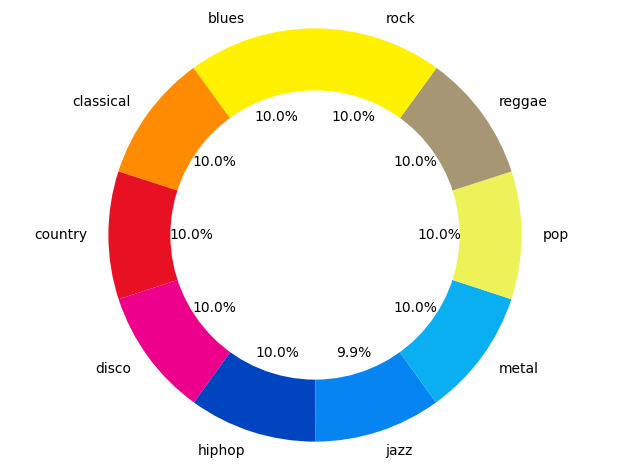

In [5]:
import numpy as np

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
           'metal', 'pop', 'reggae', 'rock' ] 

y = df['label']
values = np.unique(y,return_counts=True)[1]

labels = genres
sizes = values

# Choix des couleurs

colors =['#fff100','#ff8c00','#e81123','#ec008c','#0044bf','#0584f2','#0aaff1','#edf259','#a79674']
 
# Construction du diagramme et affichage des labels et des #fréquences en pourcentage

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Tracé du cercle au milieu

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Affichage du diagramme

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Ici les classes sont bien répartis :)